In [42]:
%matplotlib inline
import numpy as np
from skimage import io
from skimage.feature import canny
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.morphology import watershed, disk
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage import segmentation
np.set_printoptions(threshold=np.nan)
import math
from skimage import morphology
from skimage.measure import label, regionprops
from skimage.feature import corner_harris, corner_subpix, corner_peaks

In [86]:
"""
Reference:
http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html#sphx-glr-auto-examples-segmentation-plot-regionprops-py
"""

'\nReference:\nhttp://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html#sphx-glr-auto-examples-segmentation-plot-regionprops-py\n'

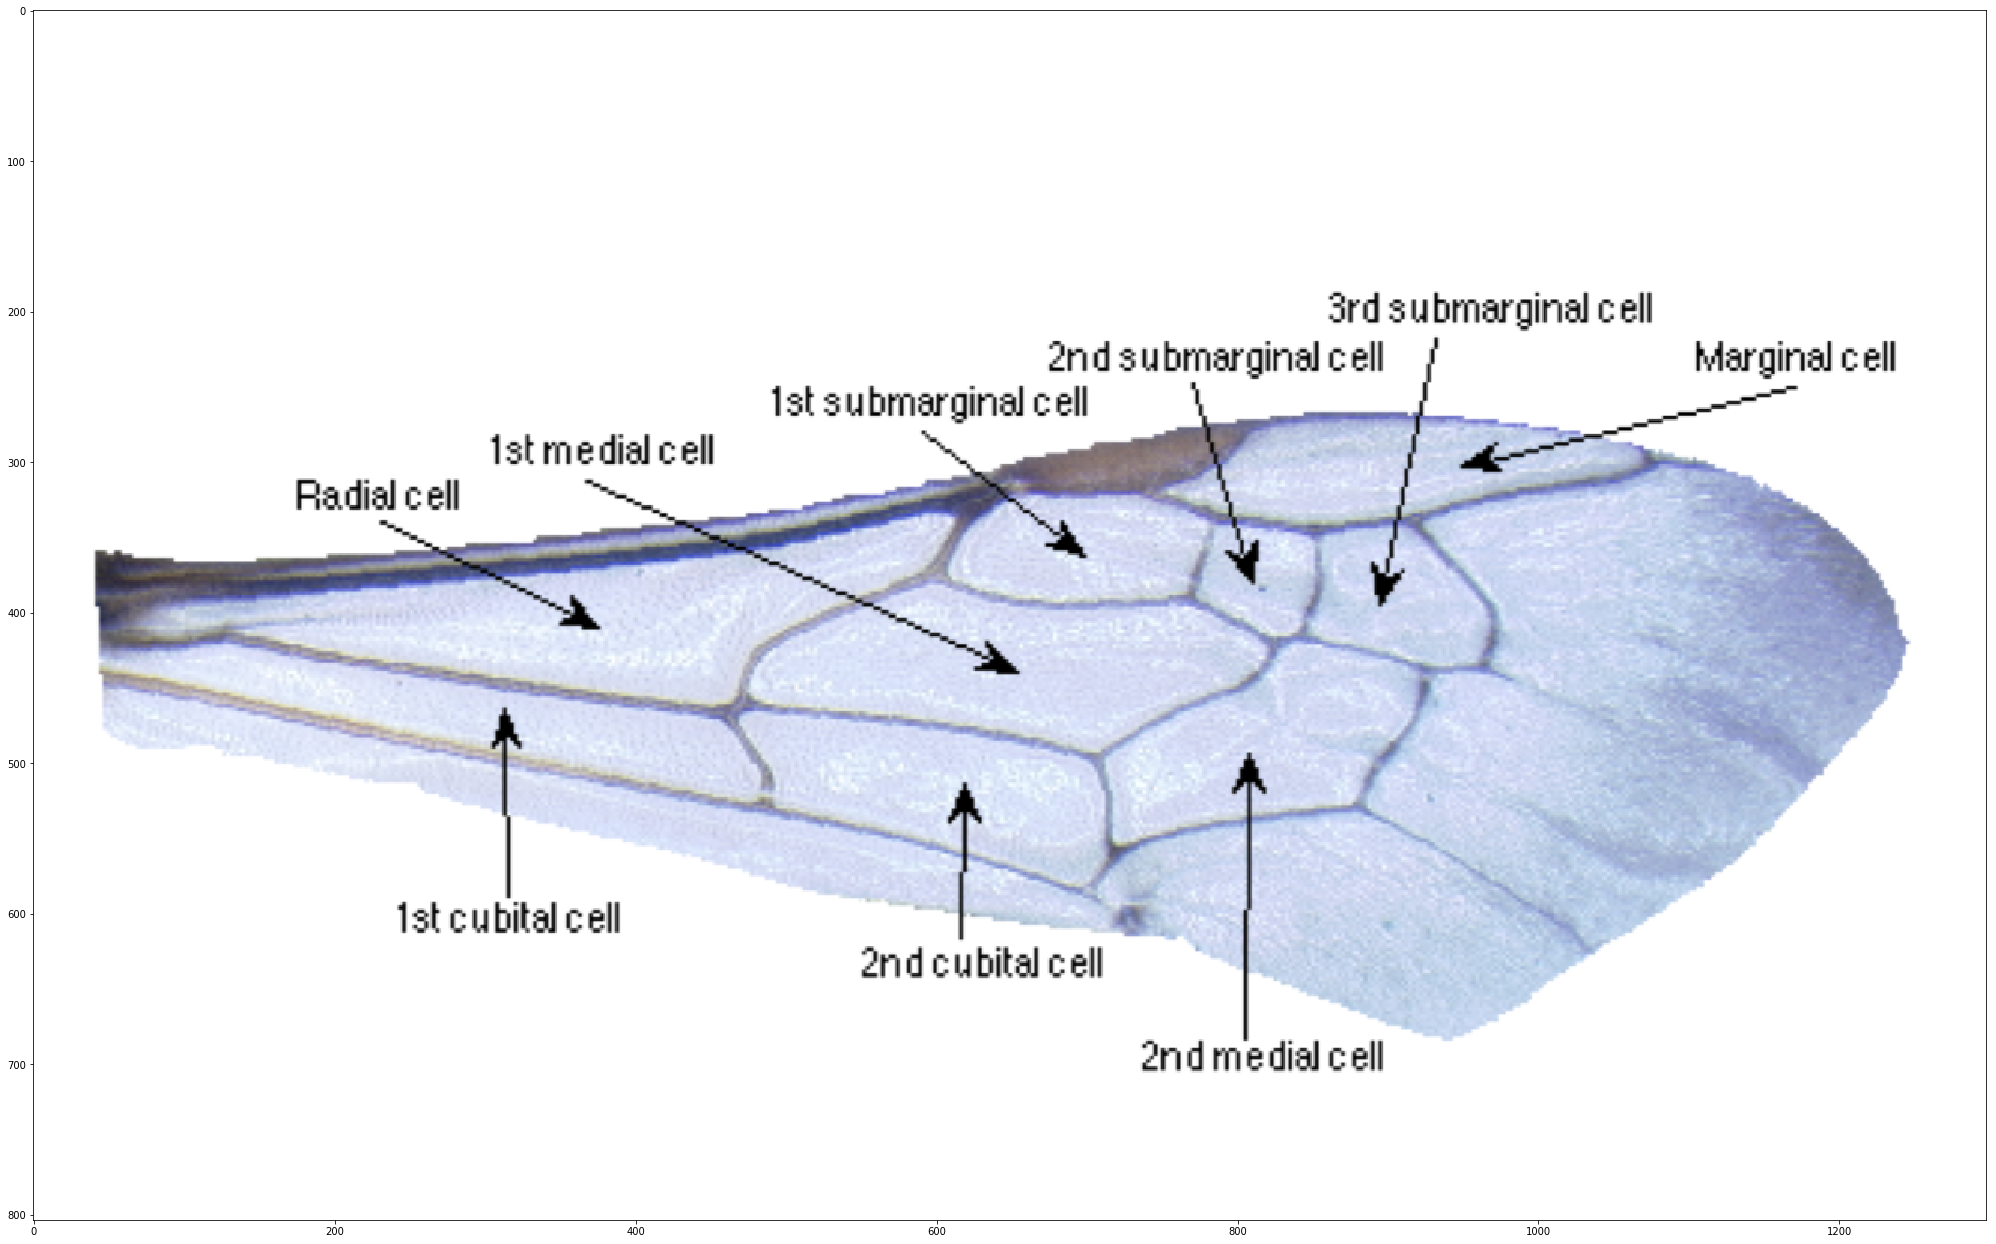

In [83]:
wing_cell = io.imread('./wing_cell.png')
plt.figure(figsize = (35,35))
plt.imshow(wing_cell)

In [79]:
# img1 = io.imread('./enhanced_image/064 Lasioglossum nymphaerum f right 4x.jpg')[:,:,0]
img1 = io.imread('./enhanced_image/1025 Agapostemon sericeus f left 3.2x.jpg')[:,:,0]
# img1 = io.imread('./enhanced_image/1 Lasioglossum leucozonium f right 3.2x.jpg')[:,:,0]
# img1 = io.imread('./enhanced_image/1 Lasioglossum leucozonium f left 3.2x.jpg')[:,:,0]
# 007 Osmia ribifloris m right 4x.jpg

In [76]:
def my_watershed(img):
    denoised = rank.median(img, disk(2))
    markers = rank.gradient(denoised, disk(5)) < 10
    markers = ndi.label(markers)[0]
    gradient = rank.gradient(denoised, disk(2))
    labels = watershed(gradient, markers)

    print('labels')
#     print(labels)

    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (8,8), sharex = True, sharey = True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap = plt.cm.gray, interpolation = 'nearest')
    ax[0].set_title("Original")
    
    ax[1].imshow(gradient, cmap = plt.cm.nipy_spectral, interpolation = 'nearest')
    ax[1].set_title("Local Gradient")

    ax[2].imshow(markers, cmap = plt.cm.nipy_spectral, interpolation = 'nearest')
    ax[2].set_title("Markers")

    # ax[3].imshow(img, cmap = plt.cm.gray, interpolation = 'nearest')
    ax[3].imshow(labels, cmap = plt.cm.nipy_spectral, interpolation = 'nearest', alpha = 0.7)
    ax[3].set_title("Segmented")

    cleared = segmentation.clear_border(labels)

    ax[4].imshow(cleared, cmap = plt.cm.nipy_spectral, interpolation = 'nearest', alpha = 0.7)
    ax[4].set_title("clear boarder")
#     plt.show()

    gradient[gradient > 30] = 255
    ax[5].imshow(gradient, cmap = plt.cm.nipy_spectral, interpolation = 'nearest', alpha = 0.7)
    ax[5].set_title("threas")
    
    for a in ax:
        a.axis('off')

    fig.tight_layout()
    plt.show()
#     print(gradient)
    


labels


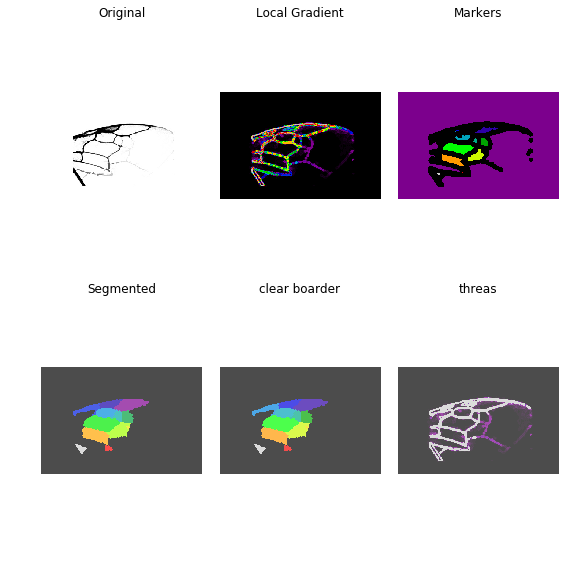

In [77]:
my_watershed(img1)
# my_watershed(img2)

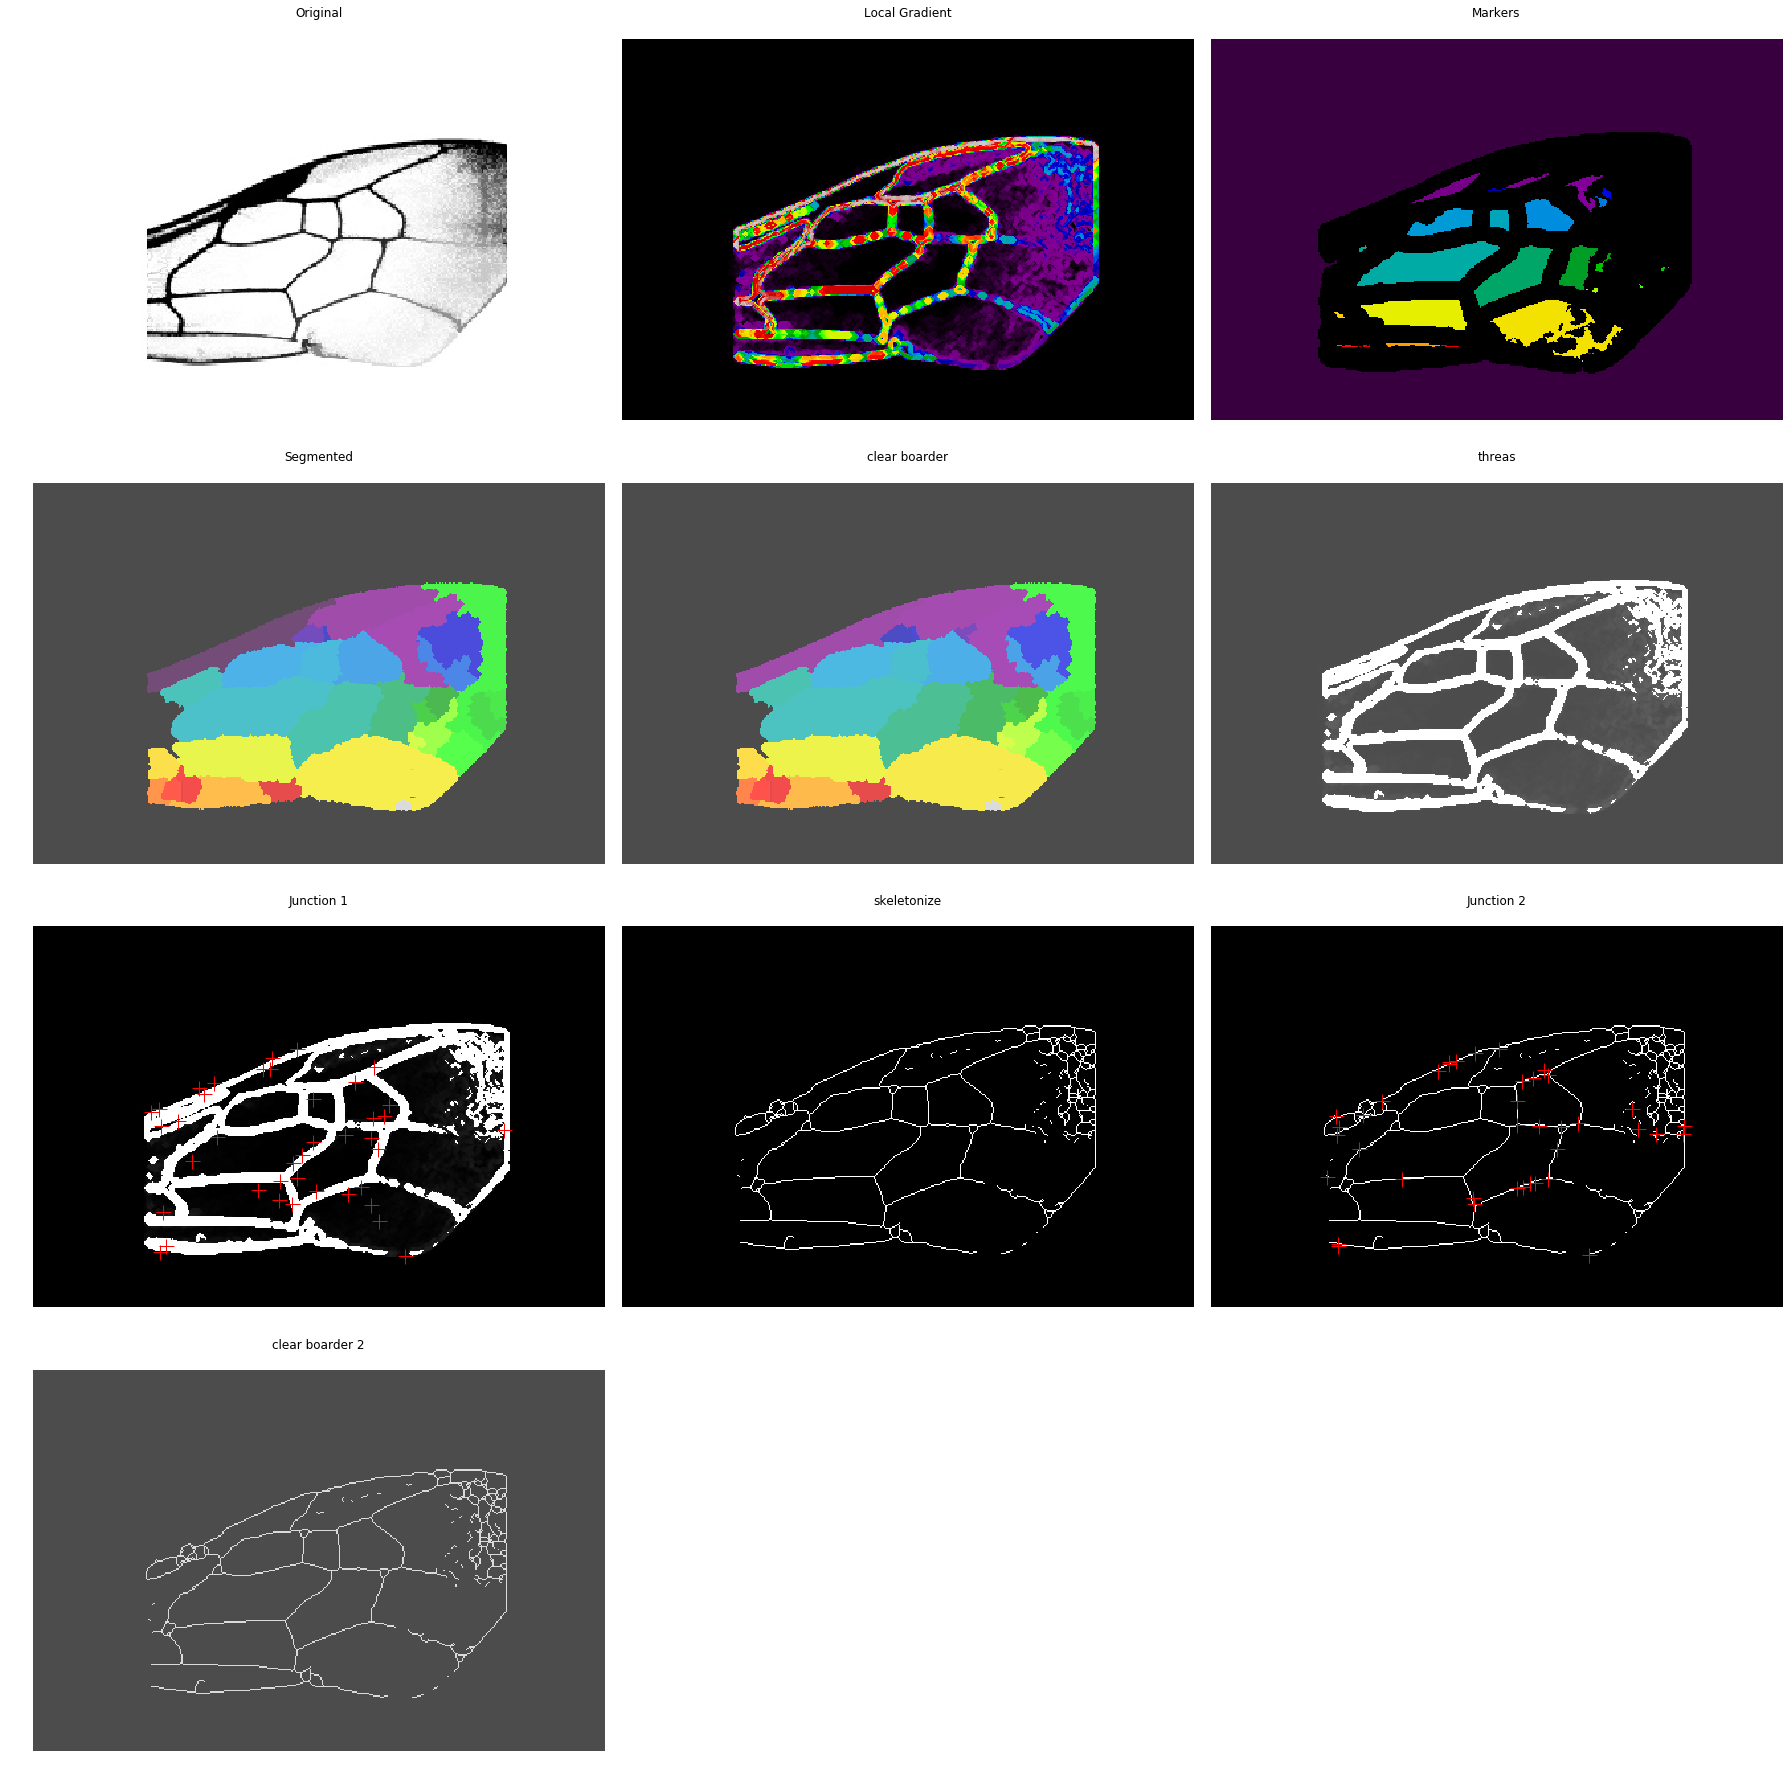

In [84]:
img = img1


## Regular watershed
denoised = rank.median(img, disk(2))
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]
gradient = rank.gradient(denoised, disk(2))
labels = watershed(gradient, markers)

# print('labels')
#     print(labels)

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (25,25), sharex = True, sharey = True)
ax = axes.ravel()

ax[0].imshow(img, cmap = plt.cm.gray, interpolation = 'nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap = plt.cm.nipy_spectral, interpolation = 'nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap = plt.cm.nipy_spectral, interpolation = 'nearest')
ax[2].set_title("Markers")

# ax[3].imshow(img, cmap = plt.cm.gray, interpolation = 'nearest')
ax[3].imshow(labels, cmap = plt.cm.nipy_spectral, interpolation = 'nearest', alpha = 0.7)
ax[3].set_title("Segmented")

cleared = segmentation.clear_border(labels)

ax[4].imshow(cleared, cmap = plt.cm.nipy_spectral, interpolation = 'nearest', alpha = 0.7)
ax[4].set_title("clear boarder")
#     plt.show()

gradient[gradient > 30] = 255
ax[5].imshow(gradient, cmap = plt.cm.gray, interpolation = 'nearest', alpha = 0.7)
ax[5].set_title("threas")

## Junction Points
image = gradient # threashold
coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords2, window_size=13)

ax[6].imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax[6].plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax[6].set_title("Junction 1")


skeletonize_img = morphology.skeletonize(image > 30)
ax[7].imshow(skeletonize_img, cmap='gray')
ax[7].set_title("skeletonize")


image = skeletonize_img
coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords2, window_size=13)
ax[8].imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax[8].plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax[8].set_title("Junction 2")


cleared_2 = segmentation.clear_border(skeletonize_img)
ax[9].imshow(cleared_2, cmap = plt.cm.nipy_spectral, interpolation = 'nearest', alpha = 0.7)
ax[9].set_title("clear boarder 2")


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()





# plt.imsave()
# from skimage import morphology

# plt.figure()
# plt.imshow(morphology.skeletonize((1- gradient) > 10), cmap='gray')
# plt.show()


## Extract Cell

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


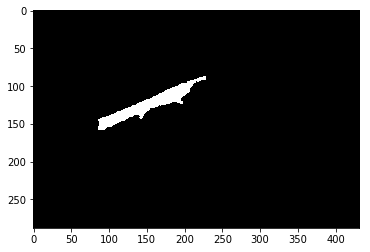

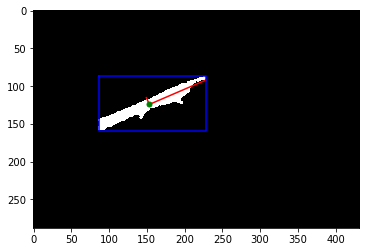

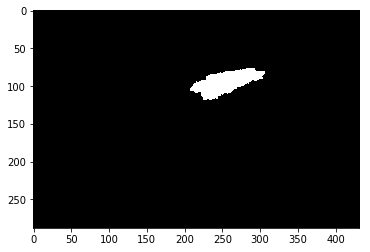

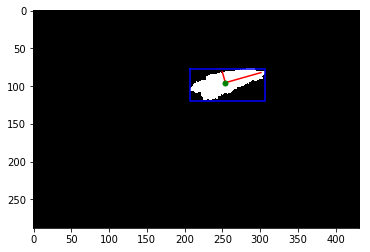

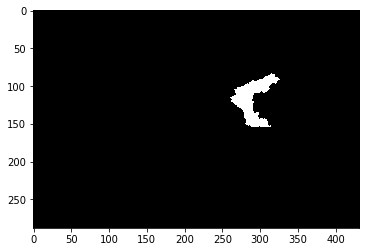

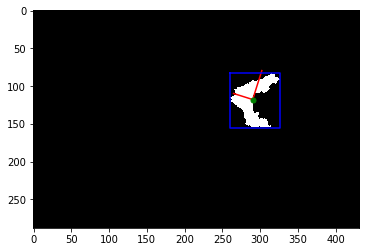

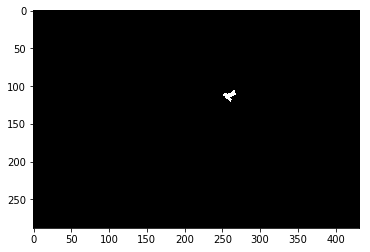

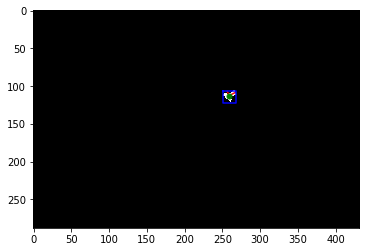

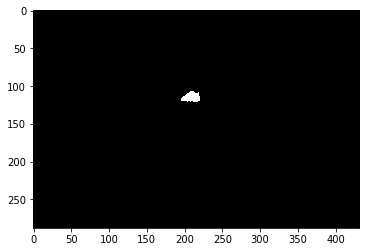

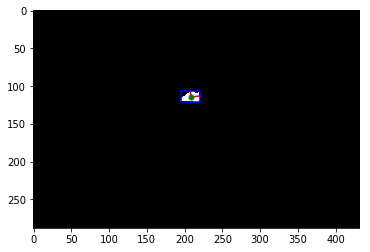

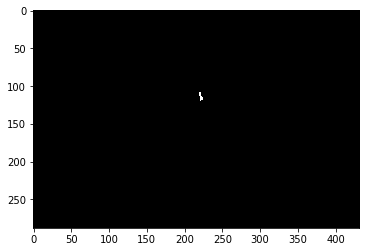

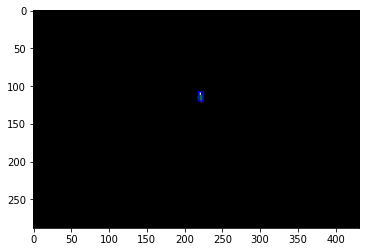

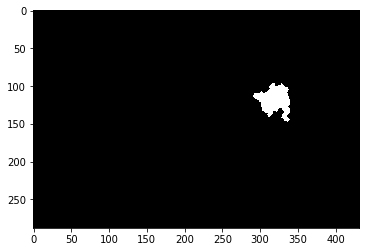

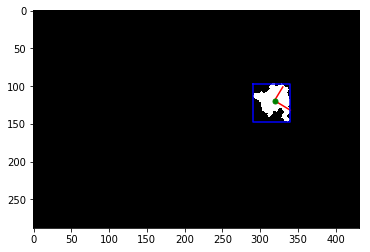

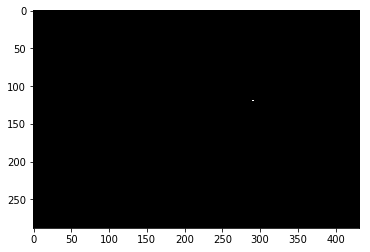

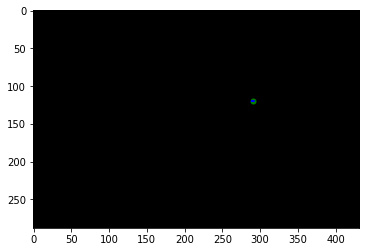

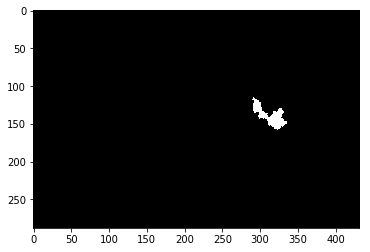

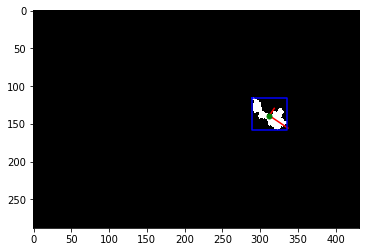

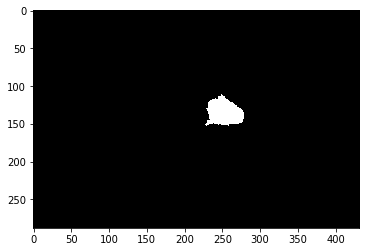

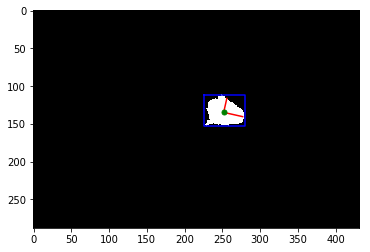

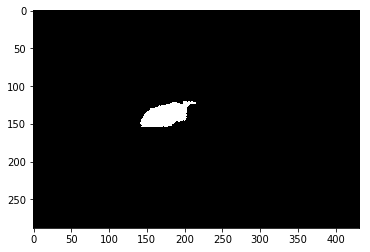

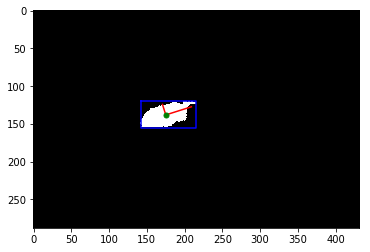

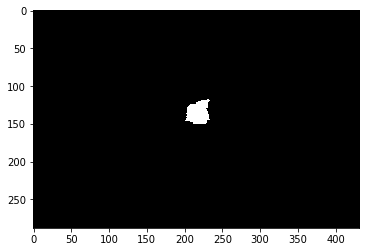

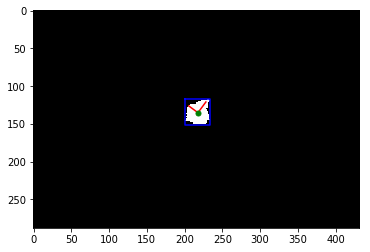

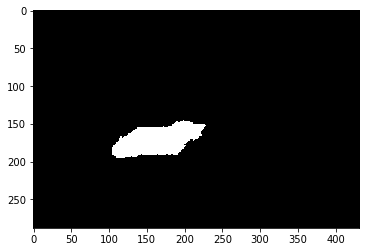

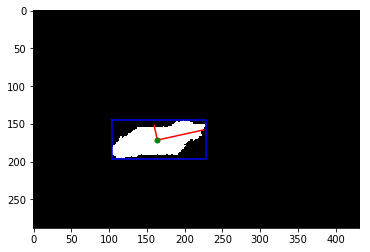

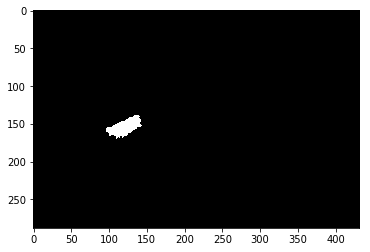

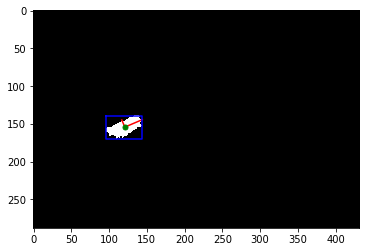

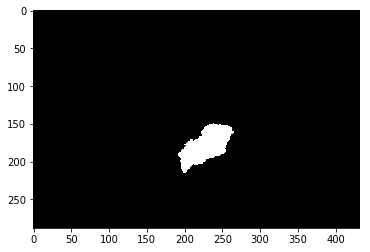

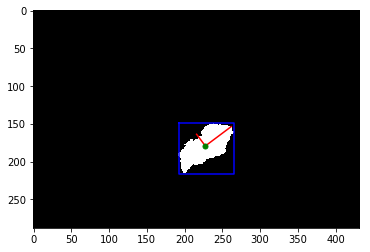

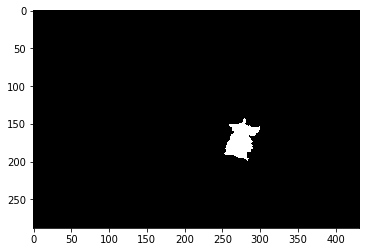

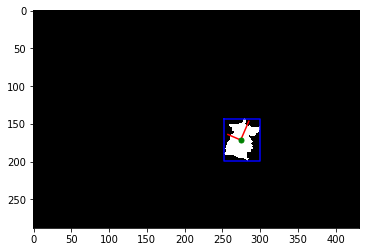

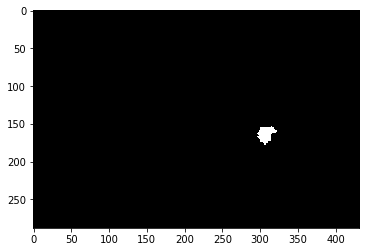

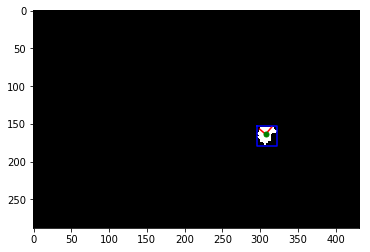

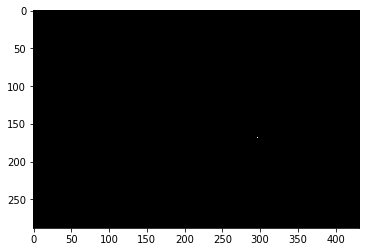

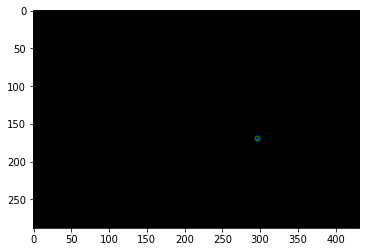

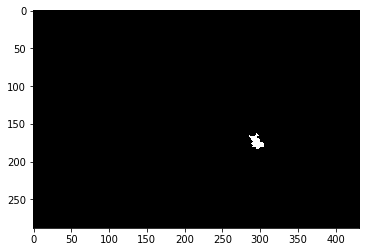

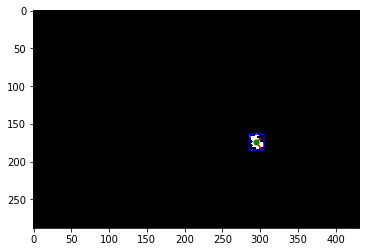

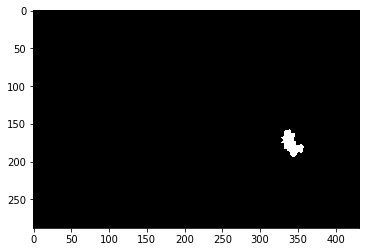

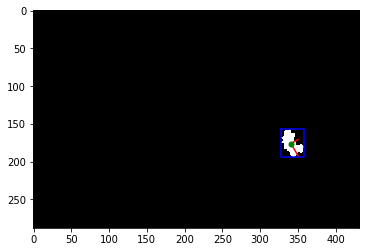

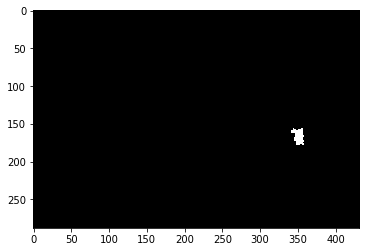

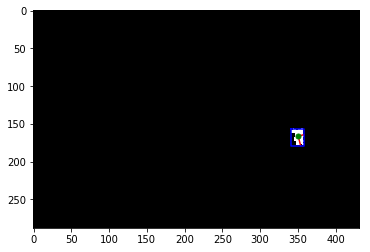

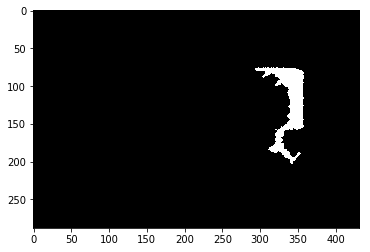

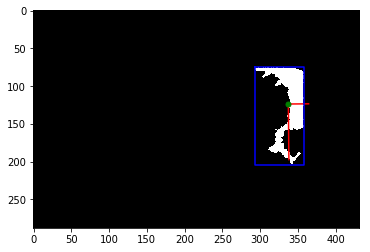

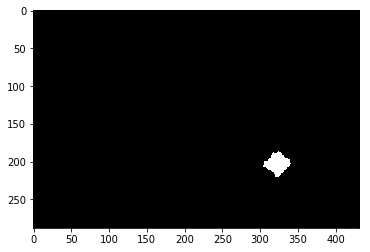

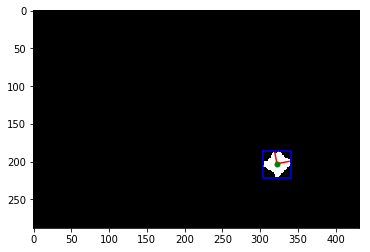

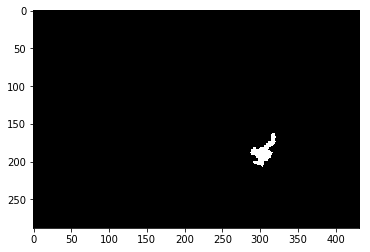

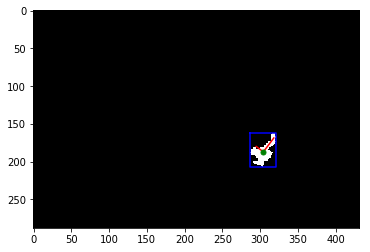

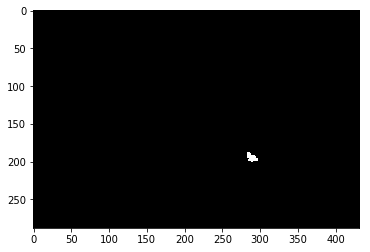

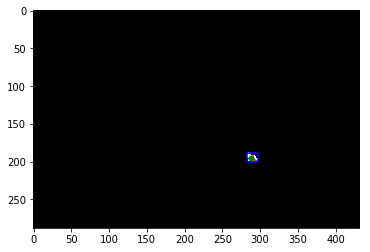

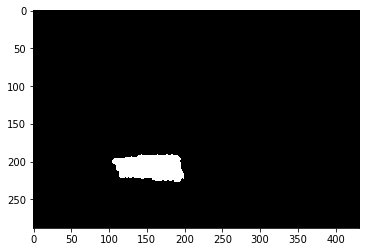

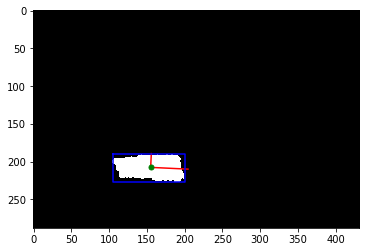

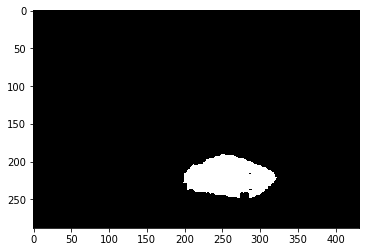

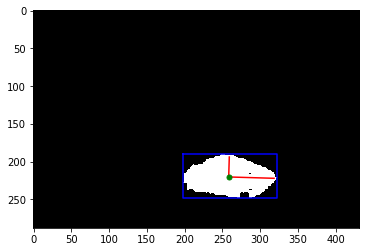

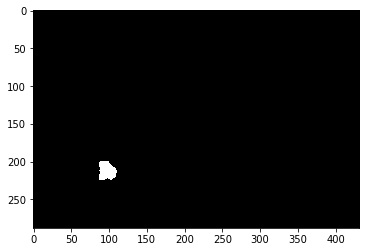

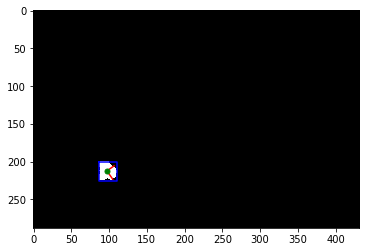

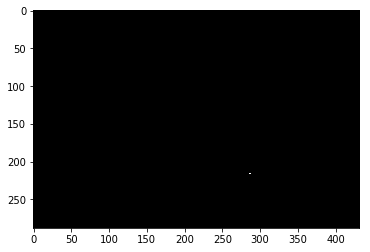

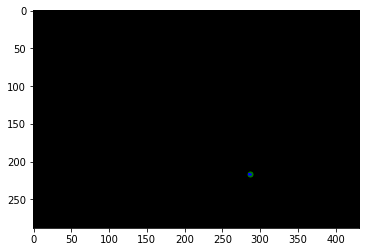

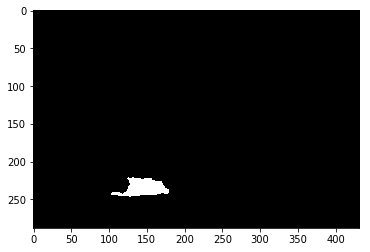

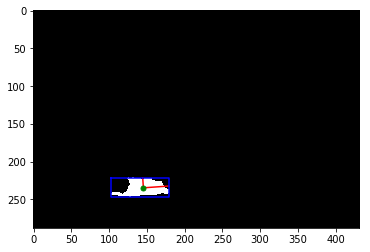

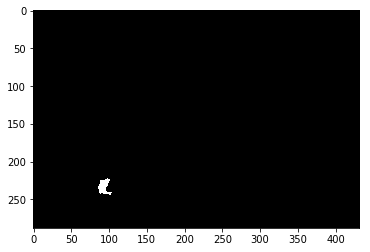

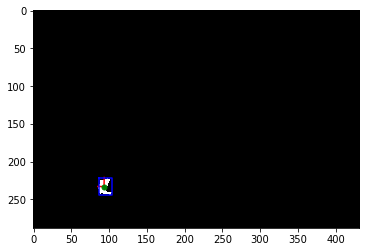

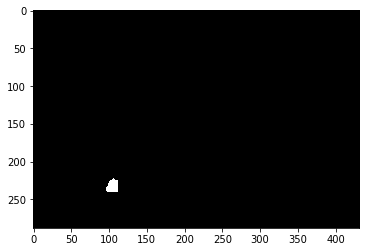

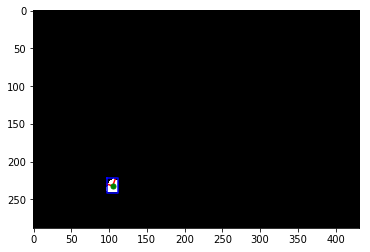

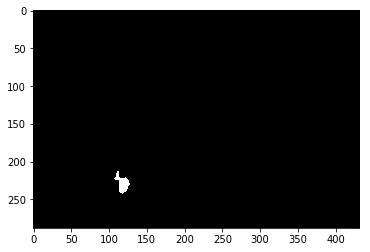

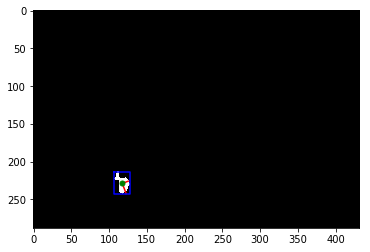

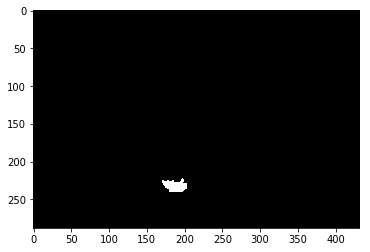

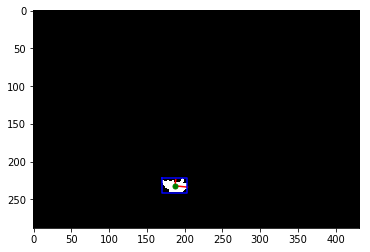

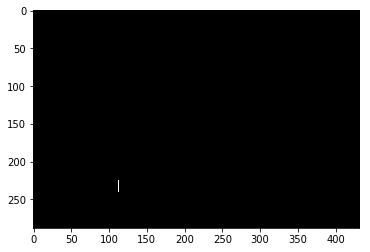

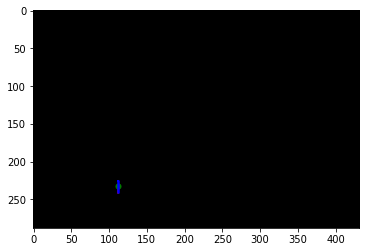

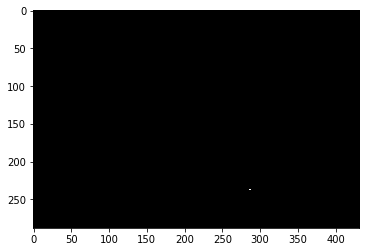

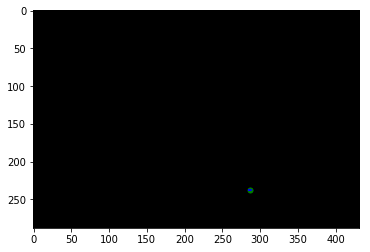

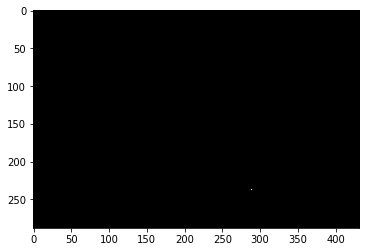

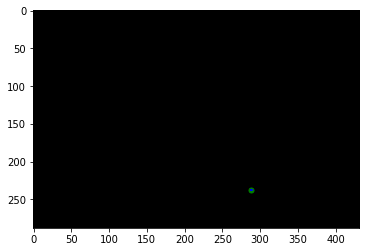

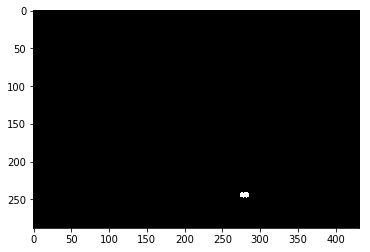

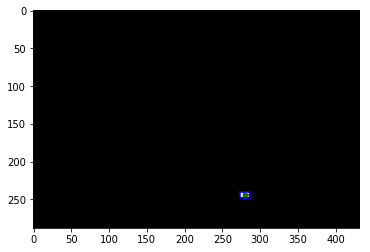

In [85]:
area = np.unique(cleared)
# for 5
print(area)
for i in area:
    if i != 0:
        copy_binary = np.zeros(cleared.shape)
        # image = np.zeros((, 600))

        copy_binary[cleared == i] = 1
        copy_binary[cleared != i] = 0
        # print(copy_binary)
        plt.figure()
        plt.imshow(copy_binary, cmap=plt.cm.gray)
        plt.show()

        image = copy_binary
        label_img = label(image)
        regions = regionprops(label_img)

        fig, ax = plt.subplots()
        ax.imshow(image, cmap=plt.cm.gray)

        for props in regions:
            y0, x0 = props.centroid
            orientation = props.orientation
            x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
            y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
            x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
            y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

            ax.plot((x0, x1), (y0, y1), '-r', linewidth=1.5)
            ax.plot((x0, x2), (y0, y2), '-r', linewidth=1.5)
            ax.plot(x0, y0, '.g', markersize=10)

            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            ax.plot(bx, by, '-b', linewidth=1.5)

        # ax.axis((0, 600, 600, 0))
        plt.show()

## Cell Area

In [18]:
np.set_printoptions(suppress=True)
area_val = np.unique(cleared)
# for 5
area = np.zeros(len(area_val))

tot_area = 0.0

for i in range(len(area_val)):
    if area_val[i] != 0:
        area_i = np.sum(np.sum(cleared == area_val[i]))
        area[i] = area_i
        tot_area += area_i

cell_area_ratio = np.divide(area, tot_area)

print("cell area", area)
print("cell_area_ratio", cell_area_ratio)
# print(tot_area)

cell area [   0.  328. 2195. 2565.    3.  854. 2896.  159.    1.  428. 1367.  277.
    2. 2307.   26.   23. 1524.   84.    1.  127.  553. 1020. 2017. 1914.
 1089.  325.  266.]
cell_area_ratio [0.         0.01467496 0.0982059  0.11475997 0.00013422 0.03820858
 0.12956915 0.00711378 0.00004474 0.01914903 0.06116057 0.01239318
 0.00008948 0.10321686 0.00116326 0.00102904 0.06818487 0.00375822
 0.00004474 0.00568207 0.02474162 0.04563554 0.09024205 0.08563375
 0.04872265 0.01454074 0.01190103]
1.0000000000000002


# Cell Perimeter

In [122]:
itemindex = np.where(cleared == i)
# print(itemindex)
pos_x, pos_y = itemindex[0][0], itemindex[1][0]
# print(np.where(cleared == 5))
# print(cleared[106][264])

def PerimeterHelper(graph, i, j, val):
    width, height = graph.shape
    
    count = 0
    if i > 0 and graph[i-1][j] == val:
        count += 1
    if j > 0 and graph[i][j-1] == val:
        count += 1
    if i < height-1 and graph[i+1][j] == val:
        count += 1
    if j < width-1 and graph[i][j+1] == val:
        count += 1
    return count

def FindPerimeter(graph, val):
    perim = 0
    height, width = graph.shape
    for i in range(height):
        for j in range(width):
            if graph[i][j] == val:
                perim += (4 - PerimeterHelper(graph, i, j, val))
    return perim

area = np.unique(cleared)
print(area)
perimeter_res = []
for i in area:
    if i != 0:
        perimeter_res.append(FindPerimeter(cleared, i))
print("Cell Perimeter: ", perimeter_res)

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Cell Perimeter:  [462, 543, 1319, 76, 88, 36, 1598, 10, 882, 218, 252, 154, 398, 170, 308, 386, 476, 4, 284, 689, 329, 3245, 820, 765, 119, 306, 1428, 110, 8, 240, 92, 68, 106, 126, 34, 8, 4, 44]


In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

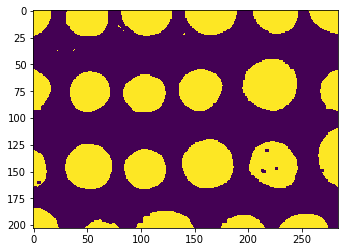

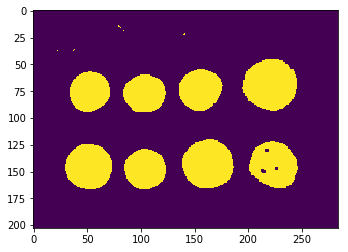

In [25]:
plt.figure()
# labels[labels <= 1] = 0
plt.imshow(bw)
plt.show()

plt.figure()
# labels[labels <= 1] = 0
plt.imshow(cleared)
plt.show()

In [42]:
from skimage.draw import circle_perimeter
from skimage.filters import gaussian_filter
import skimage.segmentation.active_contour

img = np.zeros((100, 100))
rr, cc = circle_perimeter(35, 45, 25)
img[rr, cc] = 1
img = gaussian_filter(img, 2)
s = np.linspace(0, 2*np.pi,100)
init = 50*np.array([np.cos(s), np.sin(s)]).T+50
snake = active_contour(img, init, w_edge=0, w_line=1) 
dist = np.sqrt((45-snake[:, 0])**2 +(35-snake[:, 1])**2) 
int(np.mean(dist)) 

ImportError: No module named 'skimage.segmentation.active_contour'

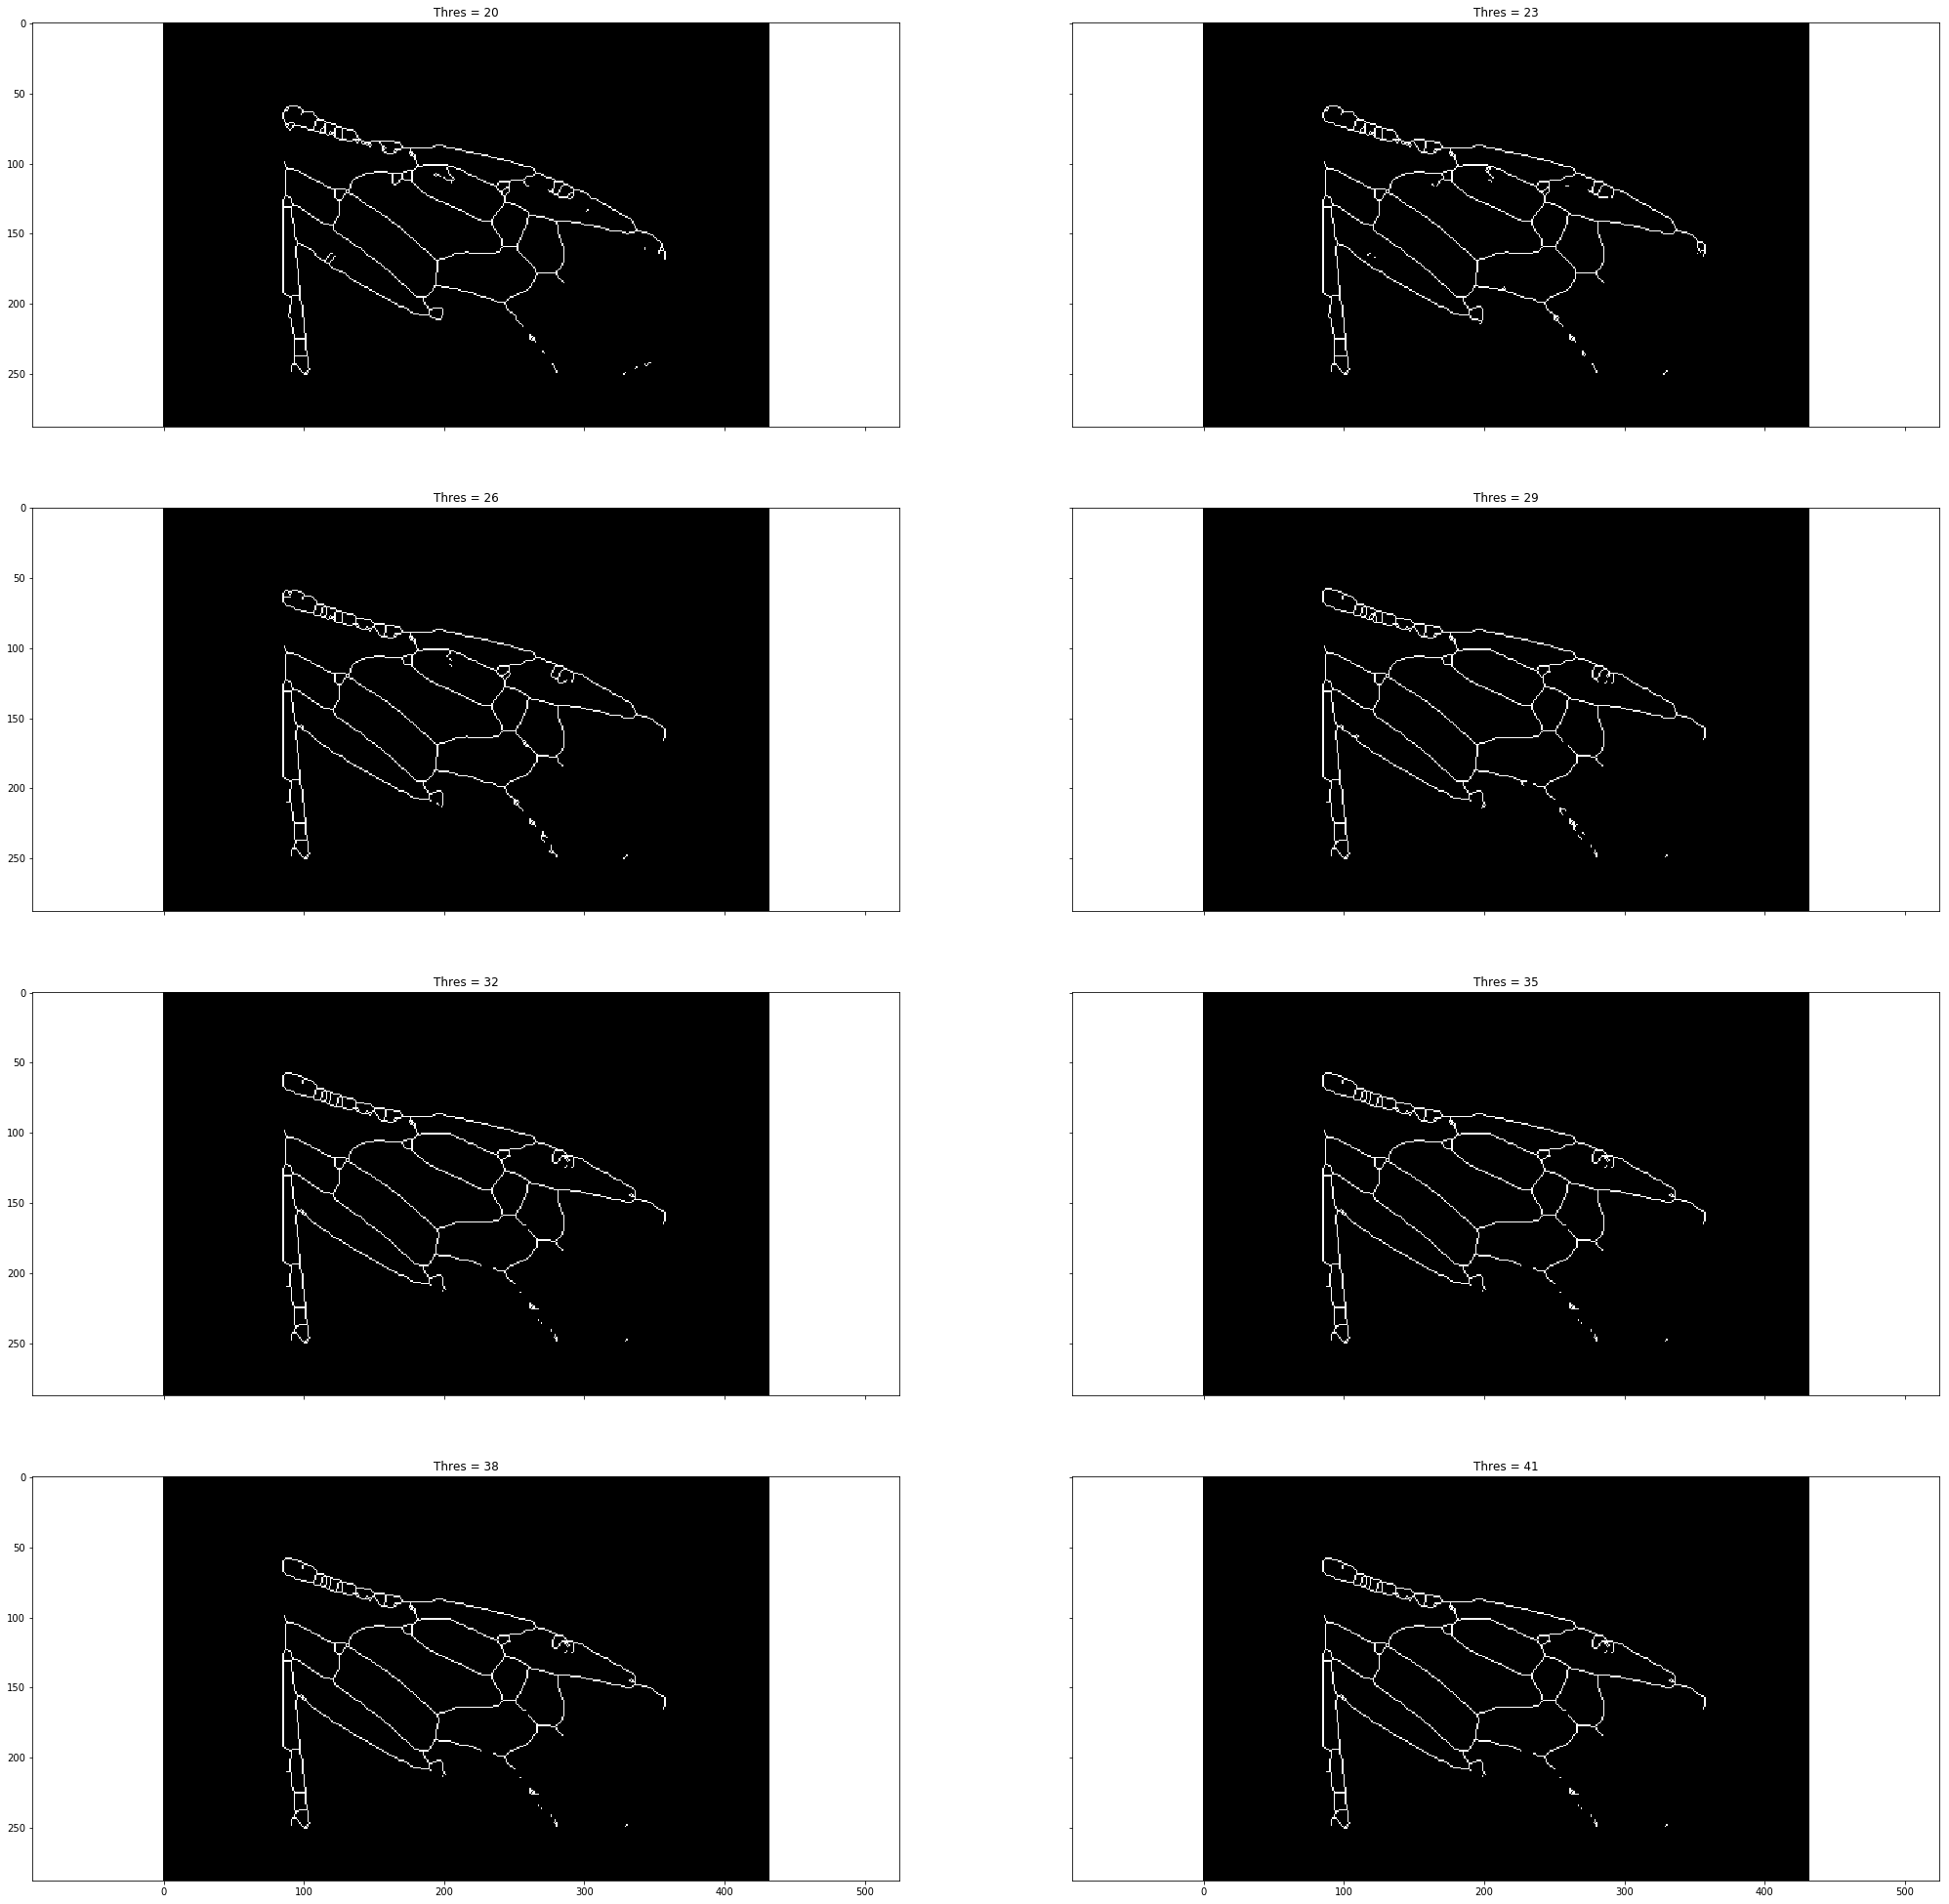

In [69]:
# for i in range(25, 3, 45):

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (35,35), sharex = True, sharey = True)
ax = axes.ravel()
#     fig, ax = plt.subplots(figsize=(25, 25))
# ax.imshow(random.rand(8, 90), interpolation='nearest')
# tight_layout()
for i in range(8):
# plt.figure()
    thres = 20 + i * 3
    ax[i].imshow(morphology.skeletonize((image) > thres), cmap='gray')
    ax[i].set_title("Thres = " + str(thres))
# ax.show()